# FEATURE EXTRACT FOR SVM AND KNN MODEL

>[FEATURE EXTRACT FOR SVM AND KNN MODEL](#scrollTo=vRfm6EPVxQ9y)

>[I. Tổng quan về điện não đồ EEG](#scrollTo=zY9aFwHqYlPG)

>>[1. Nguyên lý hoạt động:](#scrollTo=yYUk2FCtkPEM)

>>[2. Các thông số chính:](#scrollTo=yYUk2FCtkPEM)

>[II. Tổng quan về dataset (Dựa theo thông tin từ bài báo liên quan được gắn ở trên)](#scrollTo=yYUk2FCtkPEM)

>[III. Pipeline](#scrollTo=8yhWG2FIZC_V)

>>[Signal preprocessing.](#scrollTo=8yhWG2FIZC_V)

>>[Feature Extraction:](#scrollTo=8yhWG2FIZC_V)

>[IV. Implementation](#scrollTo=1_SMQLo0xvT2)



# **I. Tổng quan về điện não đồ EEG**
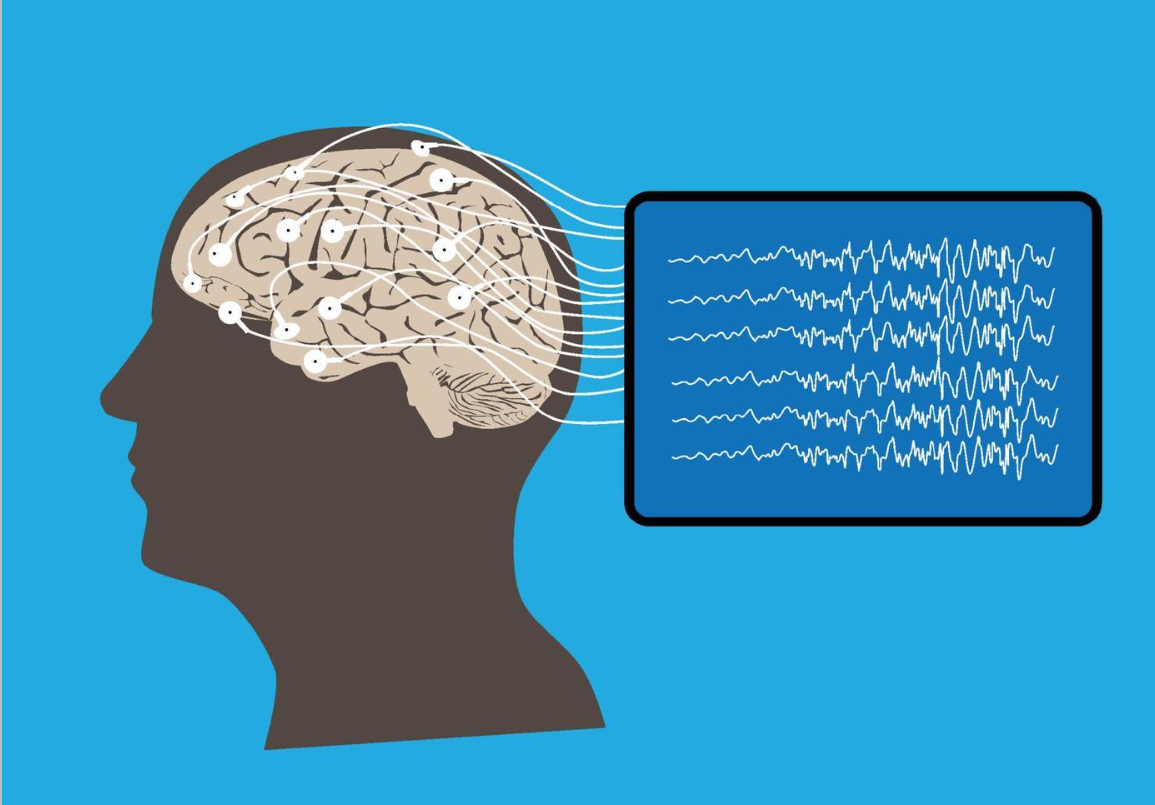


- Điện Não Đồ (EEG) là một phương pháp ghi lại các hoạt động điện của não bộ. Đây là một kỹ thuật quan trọng trong y học, thần kinh học và nghiên cứu thần kinh, giúp chẩn đoán và nghiên cứu các hoạt động của hệ thần kinh trung ương.

## **1. Nguyên lý hoạt động:**
- Nguồn gốc tín hiệu EEG: Tín hiệu EEG xuất phát từ các hoạt động điện của neuron trong não, chủ yếu là các dòng điện nhỏ do các synapse (điểm tiếp xúc giữa các tế bào thần kinh) tạo ra.
- Ghi nhận: EEG ghi lại các dao động điện từ trên bề mặt da đầu thông qua các điện cực đặt tại các vị trí cố định.
- Kết quả: Tín hiệu được biểu diễn dưới dạng sóng điện với các tần số và biên độ khác nhau.

## **2. Các thông số chính:**
- Tần số (Frequency): Biểu thị số lần dao động trên giây, đo bằng Hertz (Hz). EEG thường được chia thành các dải tần số chính:
    - Delta (0.5–4 Hz): Thường xuất hiện trong giấc ngủ sâu hoặc tổn thương não.
    - Theta (4–8 Hz): Liên quan đến trạng thái mơ màng hoặc thư giãn sâu.
    - Alpha (8–13 Hz): Thường thấy ở trạng thái nghỉ ngơi, thư giãn.
    - Beta (13–30 Hz): Liên quan đến sự tỉnh táo, tập trung hoặc lo lắng.
    - Beta (13–30 Hz): Liên quan đến sự tỉnh táo, tập trung hoặc lo lắng.
- Biên độ (Amplitude): Đo độ lớn của sóng (microvolt, µV), thể hiện mức độ hoạt động của các neuron.

# **II. Tổng quan về dataset** ***(Dựa theo thông tin từ bài báo liên quan được gắn ở trên)***
- Đây là một tập hợp gồm 34 thí nghiệm nhằm theo dõi trạng thái chú ý ở con người bằng cách sử dụng giao diện não-máy thụ động (passive EEG BCI).
- Mỗi tệp Matlab chứa đối tượng dữ liệu thu thập được từ thiết bị EMOTIV trong một thí nghiệm. Dữ liệu thô được lưu trữ trong o.data, là một mảng có kích thước {số mẫu}x25. Do đó, o.data(:,i) đại diện cho một kênh dữ liệu.
- Tần số lấy mẫu là 128 Hz (có nghĩa là mỗi giây sẽ có 128 mẫu dữ liệu được thu thập).
- Các kênh dữ liệu EEG là các kênh từ 4 đến 17: 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'
- Một bộ dữ liệu gốc bao gồm tổng cộng 25 giờ ghi nhận EEG được thu thập từ 5 người tham gia thực hiện một nhiệm vụ kiểm soát cường độ thấp đã được sử dụng. Nhiệm vụ này yêu cầu kiểm soát một đoàn tàu mô phỏng trên máy tính bằng chương trình “Microsoft Train Simulator”.
- Mỗi thí nghiệm kéo dài từ 35 đến 55 phút, trong đó người tham gia điều khiển đoàn tàu trên một tuyến đường chủ yếu là trống trải trong chương trình mô phỏng này. Trạng thái này được hiểu là giám sát thụ động đoàn tàu trong khi duy trì sự tập trung và chú ý, không đòi hỏi sự tương tác tích cực. Thực tế, phần lớn nhiệm vụ không yêu cầu sự can thiệp chủ động từ người tham gia, nhưng việc duy trì sự tập trung và chú ý liên tục là bắt buộc.
- Ba trạng thái tâm trí được nghiên cứu:
    - Tập trung bị động: Đây là trạng thái khi người tham gia duy trì sự tập trung, giám sát chuyến tàu mà không cần thực hiện nhiều hành động điều khiển.
    - Mất tập trung nhưng vẫn tỉnh táo: Trong trạng thái này, người tham gia không chú ý đến các diễn biến trên màn hình nhưng không ngủ gật. Trạng thái này được xem là nguy hiểm vì khó phát hiện, không có dấu hiệu rõ ràng bên ngoài, chẳng hạn như qua quan sát video. Trạng thái này chủ yếu diễn ra về mặt tinh thần mà không có biểu hiện ngoại vi rõ ràng.
    - Buồn ngủ: Đây là trạng thái người tham gia bắt đầu ngủ gật. Trạng thái buồn ngủ trước đây đã được liên kết với hoạt động tăng cường trong dải sóng alpha của EEG và có thể được phát hiện qua dữ liệu EEG, hoặc bằng các phương pháp khác như giám sát cử động mí mắt qua video hoặc đo nhịp tim.
- Trong bối cảnh phát hiện ba trạng thái tâm trí này, người tham gia được yêu cầu mô phỏng các trạng thái trên trong từng thí nghiệm theo hướng dẫn của người giám sát. Cụ thể:
    - Trong 10 phút đầu tiên, người tham gia thực hiện việc kiểm soát tàu một cách tập trung, theo dõi chi tiết các thông tin trên màn hình và thao tác điều khiển.
    - Trong 10 phút tiếp theo, người tham gia dừng việc theo dõi và không thực hiện bất kỳ hành động điều khiển nào, đồng thời ngừng chú ý đến màn hình. Tuy nhiên, họ không được phép nhắm mắt hoặc ngủ gật.
    - Trong 10 phút cuối, người tham gia được phép thư giãn, nhắm mắt và ngủ gật nếu muốn.



# **III. Pipeline**
  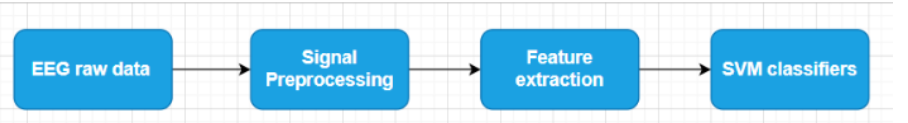

## 1. Signal preprocessing.
- Quá trình signal preprocessing là một bước quan trọng trong việc xử lý tín hiệu EEG (electroencephalogram) nhằm loại bỏ nhiễu và làm sạch dữ liệu, giúp các phân tích sau này trở nên chính xác và hiệu quả hơn. Đặc biệt, khi làm việc với tín hiệu EEG, chúng ta thường sử dụng các kỹ thuật lọc để giữ lại những thông tin hữu ích và loại bỏ các tạp âm.
- Quá trình preprocessing này sử dụng FFT và IFFT để lọc tín hiệu trong miền tần số. Phương pháp này rất hữu ích trong việc loại bỏ các tạp âm và giữ lại các thông tin quan trọng của tín hiệu EEG.
- FFT (Fast Fourier Transform):
    - FFT thực hiện chức năng phân tích tín hiệu từ miền thời gian sang miền tần số, sau đó cho phép lọc các thành phần tần số không mong muốn bằng cách loại bỏ chúng \
    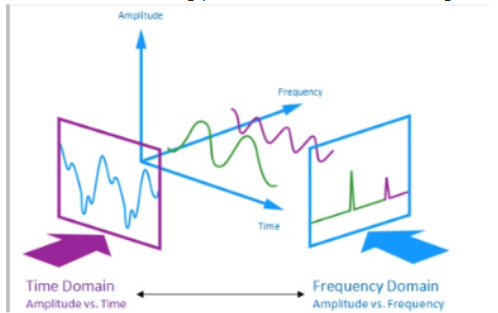
    - Biểu diễn tín hiệu trong miền tần số: Chuyển đổi tín hiệu gốc (trong miền thời gian) thành tổ hợp các sóng sin và cos tương ứng với các tần số cụ thể.
    - Phân tích thành phần tần số: Xác định các tần số xuất hiện trong tín hiệu và mức độ ảnh hưởng (biên độ) của từng tần số.
    - Hỗ trợ lọc tần số: Sau khi tín hiệu được phân tích, các tần số không nằm trong dải mong muốn được loại bỏ bằng cách đặt giá trị tương ứng của chúng về 0.
    - Chuẩn bị tín hiệu để tái dựng (kết hợp với IFFT): FFT cung cấp tín hiệu đã được chỉnh sửa trong miền tần số, giúp quá trình tái tạo tín hiệu (bằng IFFT) chỉ giữ lại các thành phần mong muốn.
   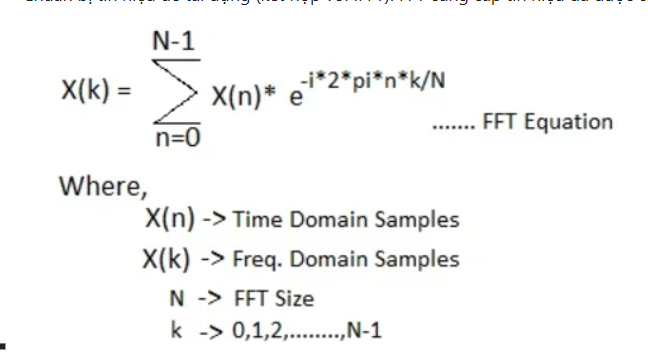
- IFFT (Inverse Fast Fourier Transform):
    - Tái dựng tín hiệu trong miền thời gian, sau khi tín hiệu đã được phân tích hoặc xử lý trong miền tần số, IFFT được sử dụng để chuyển tín hiệu trở về miền thời gian.
    - Khôi phục thông tin gốc, Nếu không có bất kỳ thay đổi nào trong miền tần số, IFFT sẽ khôi phục lại chính xác tín hiệu ban đầu từ kết quả của FFT.
    - Áp dụng tín hiệu đã qua xử lý: Nếu tín hiệu đã được chỉnh sửa (ví dụ: lọc bỏ một số tần số), IFFT tái dựng tín hiệu đã qua xử lý thành tín hiệu sử dụng được trong miền thời gian.

 ## 2. Feature Extraction:
 - Quá trình và kỹ thuật trích xuất đặc trưng từ dữ liệu EEG (Electroencephalogram) thô, sử dụng các phương pháp phổ thời gian (Time Spectrum) và các kỹ thuật tiền xử lý dữ liệu để làm sạch và chuẩn bị dữ liệu cho các bước phân tích tiếp theo.
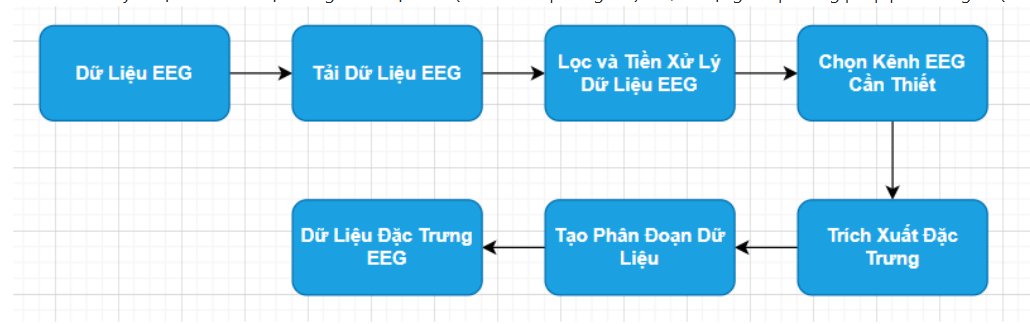


- Chọn kênh EEG cần thiết:
  - Các vị trí của các điện cực trong nghiên cứu được thực hiện theo hệ thống 10–20 tiêu chuẩn (một hệ thống phổ biến để xác định vị trí các điện cực EEG trên đầu người). Các điện cực được sử dụng là:
    1. F3, Fz, F4: Vùng trán (frontal).
    2. C3, Cz, C4: Vùng đỉnh (central).
    3. T3, T4, T5, T6: Vùng thái dương (temporal), nhưng trong nghiên cứu này chúng chỉ dùng để cung cấp dòng điện và làm mốc tham chiếu, không dùng để thu thập dữ liệu EEG.
    4. Pz: Vùng đỉnh sau (parietal).
  - Dữ liệu EEG thô được thu thập từ 7 kênh: F3, F4, Fz, C3, C4, Cz, Pz.
- Phần xử lý dữ liệu và chọn các kênh hữu ích:
  - Trong quá trình tiền xử lý và phân tích dữ liệu EEG, không phải tất cả các kênh đều quan trọng hoặc có ích cho mọi loại phân tích. Do đó, các kênh EEG có thể được chọn lọc để giảm tải và tăng tính hiệu quả cho các mô hình học máy.
  - Danh sách useful_channels = ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4'] chỉ ra các kênh hữu ích được chọn cho nghiên cứu này:
    1. F7, F3, F4, AF4 (Vùng trán - Frontal): Các kênh này nằm ở vùng trán, nơi các sóng não như sóng alpha và beta thường xuyên xuất hiện. Các sóng này liên quan đến các trạng thái nhận thức như sự tập trung hoặc căng thẳng.
    2. P7, P8 (Vùng đỉnh sau - Parietal): Các kênh này thuộc vùng đỉnh, có thể liên quan đến các hoạt động cảm giác và xử lý thông tin không gian.
    3. O1, O2 (Vùng chẩm - Occipital): Vùng này chủ yếu xử lý thông tin thị giác, và việc lấy dữ liệu từ các kênh này có thể giúp nhận diện các thay đổi trong các trạng thái thị giác hoặc sự chú ý.
  - Tập trung vào các vùng não quan trọng: Các kênh được chọn thuộc những khu vực liên quan đến các chức năng nhận thức quan trọng như sự tập trung, sự chú ý, hoặc các hoạt động thị giác.
  - Giảm số lượng kênh: Việc chỉ sử dụng một số kênh nhất định giúp giảm số lượng dữ liệu cần xử lý, giúp tăng hiệu quả và giảm độ phức tạp của mô hình.
  - Tăng tính hiệu quả: Các kênh được chọn này có khả năng phản ánh rõ ràng các thay đổi trong các trạng thái khác nhau của người tham gia thí nghiệm (ví dụ: sự tập trung, mệt mỏi, hay sự thay đổi trong nhận thức).
- Trích xuất đặc trưng tần số (Time Spectrum):
  - Mục đích: Trích xuất các đặc trưng tần số từ tín hiệu EEG để phân tích các trạng thái não bộ.
  - Phương pháp:
    - Chia tín hiệu EEG thành các cửa sổ nhỏ (có độ dài cố định, ví dụ: 8 giây).
    - Áp dụng FFT lên từng cửa sổ để chuyển tín hiệu sang miền tần số.
    - Tính năng lượng của tín hiệu trong các tần số hợp lệ (thường là dưới 40 Hz, vì các đặc trưng não bộ quan trọng nằm trong khoảng này).
    - Chuẩn hóa năng lượng để đưa tất cả các giá trị vào cùng một phạm vi, giúp quá trình phân tích sau này dễ dàng hơn.
  - Việc tính năng lượng giúp đo lường cường độ của tín hiệu trong các dải tần số cụ thể, là đặc trưng quan trọng trong việc phân biệt các trạng thái não bộ.
  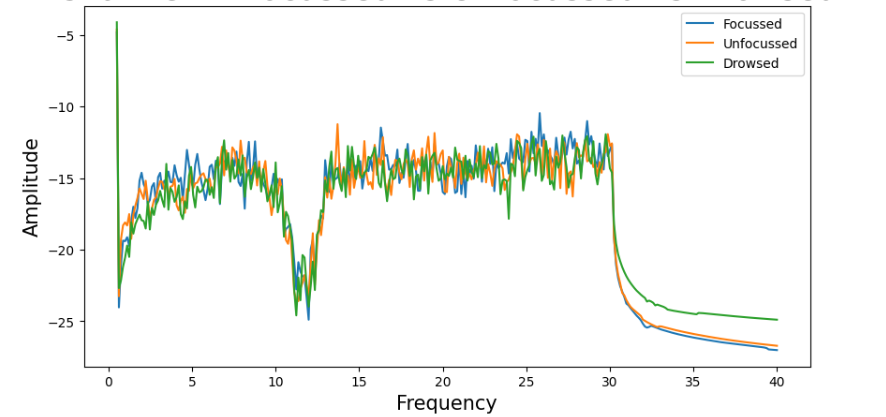

- Chuyển đổi công suất qua dexiben (dB):
  - Công suất trong EEG (hay các tín hiệu khác) có thể có sự thay đổi rất lớn giữa các giá trị, và việc sử dụng đơn vị decibel giúp làm giảm độ chênh lệch này, dễ dàng hơn trong việc phân tích và xử lý tín hiệu. Decibel là một đơn vị tỷ lệ logarithmic, vì vậy nó rất hữu ích trong việc thể hiện mối quan hệ giữa các giá trị có sự khác biệt lớn về độ lớn.
  $$dB = 10 \cdot \log_{10}(\text{power})$$


#IV. Implementation

In [2]:

import os
import pickle
import numpy as np
import pandas as pd
import scipy.io
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
!kaggle datasets download inancigdem/eeg-data-for-mental-attention-state-detection
!unzip "/content/eeg-data-for-mental-attention-state-detection.zip"

Dataset URL: https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection
License(s): copyright-authors
 97% 541M/557M [00:07<00:00, 155MB/s]
100% 557M/557M [00:07<00:00, 74.0MB/s]
Archive:  /content/eeg-data-for-mental-attention-state-detection.zip
  inflating: EEG Data/eeg_record1.mat  
  inflating: EEG Data/eeg_record10.mat  
  inflating: EEG Data/eeg_record11.mat  
  inflating: EEG Data/eeg_record12.mat  
  inflating: EEG Data/eeg_record13.mat  
  inflating: EEG Data/eeg_record14.mat  
  inflating: EEG Data/eeg_record15.mat  
  inflating: EEG Data/eeg_record16.mat  
  inflating: EEG Data/eeg_record17.mat  
  inflating: EEG Data/eeg_record18.mat  
  inflating: EEG Data/eeg_record19.mat  
  inflating: EEG Data/eeg_record2.mat  
  inflating: EEG Data/eeg_record20.mat  
  inflating: EEG Data/eeg_record21.mat  
  inflating: EEG Data/eeg_record22.mat  
  inflating: EEG Data/eeg_record23.mat  
  inflating: EEG Data/eeg_record24.mat  
  inflating: EEG Data/eeg_r

## 1. Signal preprocessing

In [4]:
class SignalPreprocessing:
    def __init__(self, fs=128, freq_range=(0, 30)):
        self.fs = fs
        self.freq_range = freq_range  # Bảng tần số lọc mặc định là từ 0 đến 30 Hz

    def FFTFilter(self, data):
        """Lọc tín hiệu bằng FFT trong khoảng tần số đã chỉ định."""
        N = len(data)
        freqs = fftfreq(N, 1 / self.fs)
        fft_vals = fft(data)
        fft_vals[(freqs < self.freq_range[0]) | (freqs > self.freq_range[1])] = 0
        return np.real(ifft(fft_vals))

    def preprocess(self, data):
        """Tiến hành lọc FFT cho toàn bộ dữ liệu."""
        return np.array([self.FFTFilter(channel_data) for channel_data in data])

##2. Feature extraction

In [5]:
class FeatureEngineering:
    def __init__(self, fs=128, useful_channels=None, duration=30):
        self.fs = fs
        self.useful_channels = useful_channels if useful_channels else []
        self.duration = duration

    def get_useful_channel_indices(self, all_channels):
        """Lấy chỉ số các kênh cần thiết từ danh sách kênh."""
        return [all_channels.index(c) for c in self.useful_channels if c in all_channels]

    @staticmethod
    def getTimeSpectrum(data, fs=128, fmax=40, interval=8, step=2):
        """Tính phổ thời gian sử dụng FFT."""
        window_size = int(interval * fs)
        step_size = int(step * fs)
        energy = []

        for start in range(0, len(data) - window_size, step_size):
            window_data = data[start:start + window_size]
            fft_vals = np.fft.fft(window_data)
            freqs = np.fft.fftfreq(len(window_data), 1/fs)
            pos_freqs = freqs[freqs >= 0]
            pos_fft_vals = np.abs(fft_vals[freqs >= 0])

            valid_freqs = pos_freqs[pos_freqs <= fmax]
            valid_fft_vals = pos_fft_vals[:len(valid_freqs)]
            energy.append(valid_fft_vals ** 2)

        scaler = MinMaxScaler()
        energy = scaler.fit_transform(energy)
        return np.array(energy)

    def cleanData(self, data, fmax=40, interval=8, step=2):
        """Làm sạch dữ liệu và trích xuất đặc trưng năng lượng."""
        max_samples = self.duration * 60 * self.fs
        data = data[:, :max_samples]

        energy_features = []
        for i in range(data.shape[0]):
            energy_features.append(self.getTimeSpectrum(
                data[i], fs=self.fs, fmax=fmax, interval=interval, step=step
            ))

        E = np.array(energy_features)
        E = E.reshape([E.shape[1], E.shape[0], E.shape[2]], order='F')
        return E

    @staticmethod
    def power_to_dB(power):
        """
        Chuyển đổi giá trị công suất sang đơn vị decibel (dB).

        Parameters:
        - power: Mảng hoặc giá trị công suất (Power).

        Returns:
        - dB: Mảng hoặc giá trị tương ứng trong đơn vị decibel (dB).
        """
        power = np.maximum(power, 1e-10)  # Thay giá trị <= 0 bằng một giá trị nhỏ nhất để tránh log(0)
        return 10 * np.log10(power)

In [6]:
def process_eeg_data(input_dir, output_dir, channels, useful_channels, fs=128, interval=8, step=2):
    """Pipeline xử lý dữ liệu EEG."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Khởi tạo SignalPreprocessing và FeatureEngineering
    signal_preprocessor = SignalPreprocessing(fs=fs)
    feature_engineer = FeatureEngineering(fs=fs, useful_channels=useful_channels)

    use_channel_inds = feature_engineer.get_useful_channel_indices(channels)

    mat_files = [f for f in os.listdir(input_dir) if f.endswith('.mat')]
    for file_name in mat_files:
        try:
            # Tải dữ liệu từ tệp .mat
            trial_data = loadmat(os.path.join(input_dir, file_name))
            eeg = np.transpose(trial_data['o']['data'][0][0][:, 3:17])
            eeg = eeg[use_channel_inds]

            # Tiến hành xử lý tín hiệu
            eeg_cleaned = signal_preprocessor.preprocess(eeg)

            # Trích xuất đặc trưng từ tín hiệu đã được xử lý
            eeg_cleaned = feature_engineer.cleanData(eeg_cleaned, fmax=40, interval=interval, step=step)

            # Chuyển đổi công suất sang decibel (dB) nếu cần
            eeg_cleaned_db = np.array([feature_engineer.power_to_dB(eeg) for eeg in eeg_cleaned])

            # Tạo các phân đoạn dữ liệu
            chunk_num = int(30 * 60 / step / 3)
            trash_num = int((20 - interval) / step)
            trial = {
                'focussed': eeg_cleaned_db[trash_num:chunk_num - trash_num],
                'unfocussed': eeg_cleaned_db[chunk_num + trash_num:2 * chunk_num - trash_num],
                'drowsed': eeg_cleaned_db[2 * chunk_num + trash_num:3 * chunk_num - trash_num],
            }

            # Lưu dữ liệu
            data = {
                'channels': useful_channels,
                'fs': fs,
                'trial': trial,
            }
            output_file = os.path.join(output_dir, f'{file_name[:-4]}.pkl')
            with open(output_file, 'wb') as f:
                pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

            print(f'Đã xử lý tệp {file_name} và lưu vào {output_file}')
        except Exception as e:
            print(f"Lỗi khi xử lý tệp {file_name}: {e}")


# Cấu hình và chạy pipeline
if __name__ == "__main__":
    input_dir = '/content/eeg data/EEG Data'
    output_dir = '/content/data_for_SVM_KNN'
    fs = 128
    channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    useful_channels = ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4']

    process_eeg_data(input_dir, output_dir, channels, useful_channels, fs=fs, interval=8, step=2)

Đã xử lý tệp eeg_record16.mat và lưu vào /content/data_for_SVM_KNN/eeg_record16.pkl
Đã xử lý tệp eeg_record10.mat và lưu vào /content/data_for_SVM_KNN/eeg_record10.pkl
Đã xử lý tệp eeg_record6.mat và lưu vào /content/data_for_SVM_KNN/eeg_record6.pkl
Đã xử lý tệp eeg_record28.mat và lưu vào /content/data_for_SVM_KNN/eeg_record28.pkl
Đã xử lý tệp eeg_record19.mat và lưu vào /content/data_for_SVM_KNN/eeg_record19.pkl
Đã xử lý tệp eeg_record9.mat và lưu vào /content/data_for_SVM_KNN/eeg_record9.pkl
Đã xử lý tệp eeg_record2.mat và lưu vào /content/data_for_SVM_KNN/eeg_record2.pkl
Đã xử lý tệp eeg_record13.mat và lưu vào /content/data_for_SVM_KNN/eeg_record13.pkl
Đã xử lý tệp eeg_record30.mat và lưu vào /content/data_for_SVM_KNN/eeg_record30.pkl
Đã xử lý tệp eeg_record20.mat và lưu vào /content/data_for_SVM_KNN/eeg_record20.pkl
Đã xử lý tệp eeg_record15.mat và lưu vào /content/data_for_SVM_KNN/eeg_record15.pkl
Đã xử lý tệp eeg_record22.mat và lưu vào /content/data_for_SVM_KNN/eeg_record22.pk

In [7]:
with open('/content/data_for_SVM_KNN/eeg_record15.pkl', 'rb') as f:
  loaded_data = pickle.load(f)

loaded_data

{'channels': ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4'],
 'fs': 128,
 'trial': {'focussed': array([[[-100.        ,  -22.30094721,  -25.87914665, ...,
            -23.84588557,  -23.86085234,  -23.87560966],
          [  -7.85750682,  -20.36929292,  -28.60872418, ...,
            -35.4468371 ,  -35.49844506,  -35.54932463],
          [  -5.76753505,  -24.25842524,  -24.2838656 , ...,
            -32.12372735,  -32.13754571,  -32.15099016],
          ...,
          [  -5.87116985,  -46.74182164,  -30.4515117 , ...,
            -25.56746175,  -25.57264377,  -25.57770958],
          [  -5.39205933,  -17.52325839,  -20.08010792, ...,
            -14.16090406,  -14.1643443 ,  -14.16770938],
          [  -6.92304323,  -31.01143746,  -25.52561155, ...,
            -23.11820705,  -23.12961382,  -23.14087785]],
  
         [[  -9.28485895,   -9.91391576,  -12.92586035, ...,
             -6.50734659,   -6.51347045,   -6.51946595],
          [  -4.62014507,  -14.06433821,  -17.6507357 , ...,
   